In [1]:
# Ignore the warnings
import warnings
# warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# System related and data input controls
import os

# Python path
import sys
base_folder = 'DataScience'
location_base = os.path.join(os.getcwd().split(base_folder)[0], base_folder)
location_module = [os.path.join(location_base, 'Module')] 
for each in location_module:
    if each not in sys.path:
        sys.path.append(each)

# Auto reload of library
%reload_ext autoreload
%autoreload 2

from import_KK import *
# DeviceStrategy_CPU()
DeviceStrategy_GPU()
from preprocessing_KK import *
from preprocessing_project_KK import *
from description_KK import *
from algorithm_machinelearning_KK import *
from algorithm_deeplearning_KK import *
from evaluation_KK import *
from visualization_KK import *

JAVA is in the system path?:  False
JAVA is in the system path?:  Adding...
Operation Machine:  x86_64
Operation Platform:  64bit
OS Type:  Linux
OS Version:  6.6.87.2-microsoft-standard-WSL2
Python Version:  3.12.12 | packaged by Anaconda, Inc. | (main, Oct 21 2025, 20:16:04) [GCC 11.2.0]


2026-02-03 13:52:17.230433: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-02-03 13:52:17.277571: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-02-03 13:52:18.242326: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.



=========== GPU Strategy ===========
Detected GPUs:
 [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Only 1 GPU detected. Using single-GPU strategy.


======= GPU / CUDA / STATUS ========
Cuda Ready?        True
CUDA Version:      12.5.1
cuDNN Version:     9

TF Version:        2.20.0
Keras Version:     3.13.0
True
Torch Version:       2.8.0+cu128
Torch CUDA Version:  12.8
Torch cuDNN Version: 91002

Torch GPUs Available: 1
Use the GPU: NVIDIA GeForce RTX 4070 Laptop GPU



# Result (Prediction)

In [47]:
# Data Loading
file_location = os.path.join('.', 'Result', 'Prediction_KK.csv')
df = pd.read_csv(file_location)
# Filtering
df = df[df.Date>='2024-02-01'].reset_index().iloc[:,1:]
# Output
df_baseline1 = df.loc[(df.Lookback == 5) & (df['Feature Case'] == 'Macro Only') & (df.Model == 'GRU')].reset_index().iloc[:,1:]
df_baseline2 = df.loc[(df.Lookback == 20) & (df['Feature Case'] == 'Macro Only') & (df.Model == 'GRU')].reset_index().iloc[:,1:]
df_final = df.loc[(df.Lookback == 20) & (df['Feature Case'] == 'Macro + Event + Sentiment (Both)') & (df.Model == 'CNN-GRU')].reset_index().iloc[:,1:]
# Setting
df_line.Date = pd.to_datetime(df_line.Date)
df_line.set_index('Date', inplace=True)
df_line

Y True  Y Pred(base1)  Y Pred(base2)  Y Pred(best)
Date                                                             
2024-02-01 1,328.9500     1,333.1329     1,333.6892    1,333.8860
2024-02-02 1,337.7600     1,328.0110     1,329.1089    1,329.3270
2024-02-05 1,333.1300     1,336.4458     1,337.8497    1,338.5504
2024-02-06 1,326.8700     1,331.6085     1,333.2559    1,334.1456
2024-02-07 1,328.2900     1,325.3331     1,327.1897    1,328.0836
...               ...            ...            ...           ...
2024-12-20 1,444.5700     1,441.3127     1,443.2894    1,445.9564
2024-12-23 1,451.2800     1,441.1289     1,443.0248    1,445.9357
2024-12-24 1,458.9300     1,447.8973     1,450.2180    1,452.4991
2024-12-26 1,467.0800     1,455.6696     1,458.1140    1,460.2483
2024-12-27 1,472.5000     1,464.0065     1,466.2950    1,468.7133

[209 rows x 4 columns]

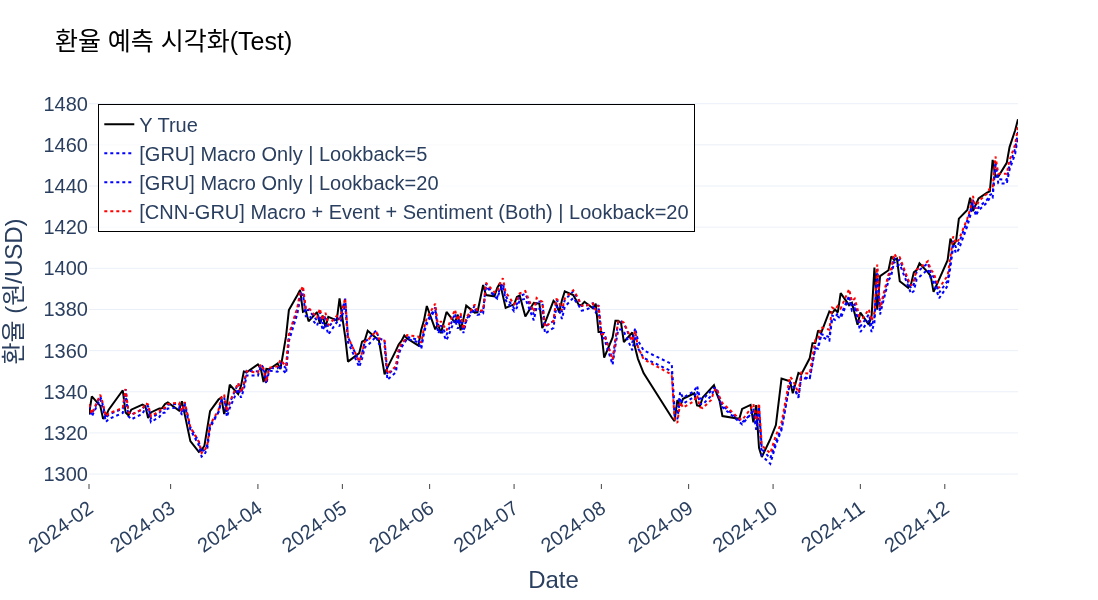

In [69]:
import plotly.graph_objects as go
import os
import pandas as pd

def plot_line(df, title='Line Plot', x_title='Date', y_title='Count',
              save_local=True, save_name='lineplot.png',
              name_map=None, color_map=None, style_map=None,
              legend_pos='top_left'): # legend_pos 인자 추가
    
    # 1. Date 변환
    if not pd.api.types.is_datetime64_any_dtype(df.index):
        try:
            df.index = pd.to_datetime(df.index)
        except:
            pass
    fig = go.Figure()

    # 데이터 Trace 추가 (이전과 동일)
    for col in df.columns:
        trace_name = name_map.get(col, col) if name_map else col
        line_color = color_map.get(col, None) if color_map else None
        line_dash = style_map.get(col, 'solid') if style_map else 'solid'
        fig.add_trace(go.Scatter(
            x=df.index, y=df[col], mode='lines', name=trace_name,
            line=dict(color=line_color, dash=line_dash)
        ))      

    # 2. Legend 위치 설정 로직
    # 기본값: 그래프 바깥 오른쪽 (Plotly 기본)
    legend_setting = {} 
    if legend_pos == 'top_left':
        legend_setting = dict(
            yanchor="top", y=0.99,   # 상단
            xanchor="left", x=0.01,  # 왼쪽
            bgcolor='rgba(255, 255, 255, 0.7)', # 흰색 배경 (70% 불투명)
            bordercolor="Black", borderwidth=1  # 테두리 (선택사항)
        )
    elif legend_pos == 'top_right':
        legend_setting = dict(
            yanchor="top", y=0.99,
            xanchor="right", x=0.99,
            bgcolor='rgba(255, 255, 255, 0.7)'
        )
    elif legend_pos == 'bottom_right':
        legend_setting = dict(
            yanchor="bottom", y=0.01,
            xanchor="right", x=0.99,
            bgcolor='rgba(255, 255, 255, 0.7)'
        )
    elif legend_pos == 'top_center_horizontal':
        legend_setting = dict(
            orientation="h",       # 가로 배치
            yanchor="bottom", y=1.02, # 그래프 바로 위
            xanchor="right", x=1
        )

    # Layout 설정
    fig.update_layout(
        xaxis_title=x_title, yaxis_title=y_title,
        width=1000, height=600,
        title=dict(text=title, font=dict(size=25, color='black')),
        font=dict(size=20),
        legend_font_size=20,
        template='plotly_white',
        # 여기서 legend 설정을 적용합니다.
        legend=legend_setting 
    )

    # X축 설정 (이전과 동일)
    fig.update_xaxes(
        tickangle=-35, tickfont=dict(size=20), ticks='outside', showgrid=False,
        tickformat="%Y-%m", dtick="M1"
    )
    fig.update_yaxes(showgrid=True)
    fig.show()

    # Save
    if save_local:
        folder_location = os.path.join(os.getcwd(), 'Result', 'Lineplot')
        os.makedirs(folder_location, exist_ok=True)
        save_path = os.path.join(folder_location, save_name)
        # fig.write_image(save_path, engine='kaleido')
        print(f"Saved to {save_path}")

my_names = {
    'Y True': 'Y True',
    'Y Pred(base1)': '[GRU] Macro Only | Lookback=5',
    'Y Pred(base2)': '[GRU] Macro Only | Lookback=20',
    'Y Pred(best)': '[CNN-GRU] Macro + Event + Sentiment (Both) | Lookback=20'
}
my_colors = {
    'Y True': 'black',       # 실제값은 검정
    'Y Pred(base1)': 'blue', # 베이스 모델은 회색
    'Y Pred(base2)': 'blue', 
    'Y Pred(best)': 'red'    # 베스트 모델은 빨강 강조
}
my_styles = {
    'Y True': 'solid',
    'Y Pred(base1)': 'dot',  # 점선
    'Y Pred(base2)': 'dot',
    'Y Pred(best)': 'dot'
}
plot_line(
    df_line, title='환율 예측 시각화(Test)', y_title='환율 (원/USD)', 
    legend_pos='top_left',
    name_map=my_names, 
    color_map=my_colors, 
    style_map=my_styles,
    save_local=False
)

# Result (Evaluation)

In [2]:
# Hyperparameters
METRIC_COLNAMES = ["RMSE", "MSPE", "MAE", "MAPE", "MedAE", "MedAPE"]
LABEL_COLNAME = "Model & Feature Case"
SCALING = True
TOP_RANKING = 10

In [3]:
# Data Loading
file_location = os.path.join('.', 'Result', 'PerformanceEvaluation_20260129_KK.xlsx')
df = pd.read_excel(file_location, sheet_name='Total')
df['Model & Feature Case'] = '[' + df.Model + ']  ' + df['Feature Case']
df = df[[col for col in df.columns if col != 'Radar Chart']]


Top 10 by Radar Area:


Model & Feature Case   RMSE   MSPE    MAE   MAPE  \
0        [GRU]  Macro + Event + Sentiment (Both) 0.9343 0.9327 0.9692 0.9676   
1  [CNN-GRU]  Macro + Event + Sentiment (Direct) 0.9677 0.9674 0.9709 0.9708   
2            [CNN-GRU]  Macro + Sentiment (Both) 1.0000 0.9981 1.0000 1.0000   
3       [LSTM]  Macro + Event + Sentiment (Both) 0.9743 0.9694 0.9734 0.9724   
4        [CNN-GRU]  Macro + Sentiment (Indirect) 0.9587 0.9581 0.9649 0.9647   
5                          [CNN-GRU]  Macro Only 0.9505 0.9495 0.9499 0.9499   
6                       [CNN-GRU]  Macro + Event 0.9088 0.9171 0.9388 0.9421   
7           [CNN-LSTM]  Macro + Sentiment (Both) 0.9840 0.9839 0.9823 0.9831   
8                          [LSTM]  Macro + Event 0.9619 0.9610 0.9981 0.9983   
9                      [CNN-LSTM]  Macro + Event 0.9567 0.9550 0.9778 0.9771   

   MedAE  MedAPE  Area of Radar  
0 1.0000  1.0000         2.4315  
1 0.9059  0.9187         2.3463  
2 0.8133  0.8533         2.3196  
3 0.9031  0.8363         2.2877  
4 0.8825  0.8109         2.2163  
5 0.8004  0.9158         2.1958  
6 0.9301  0.8628         2.1832  
7 0.7694  0.7623         2.1622  
8 0.7402  0.7492         2.1193  
9 0.7212  0.7913         2.0937

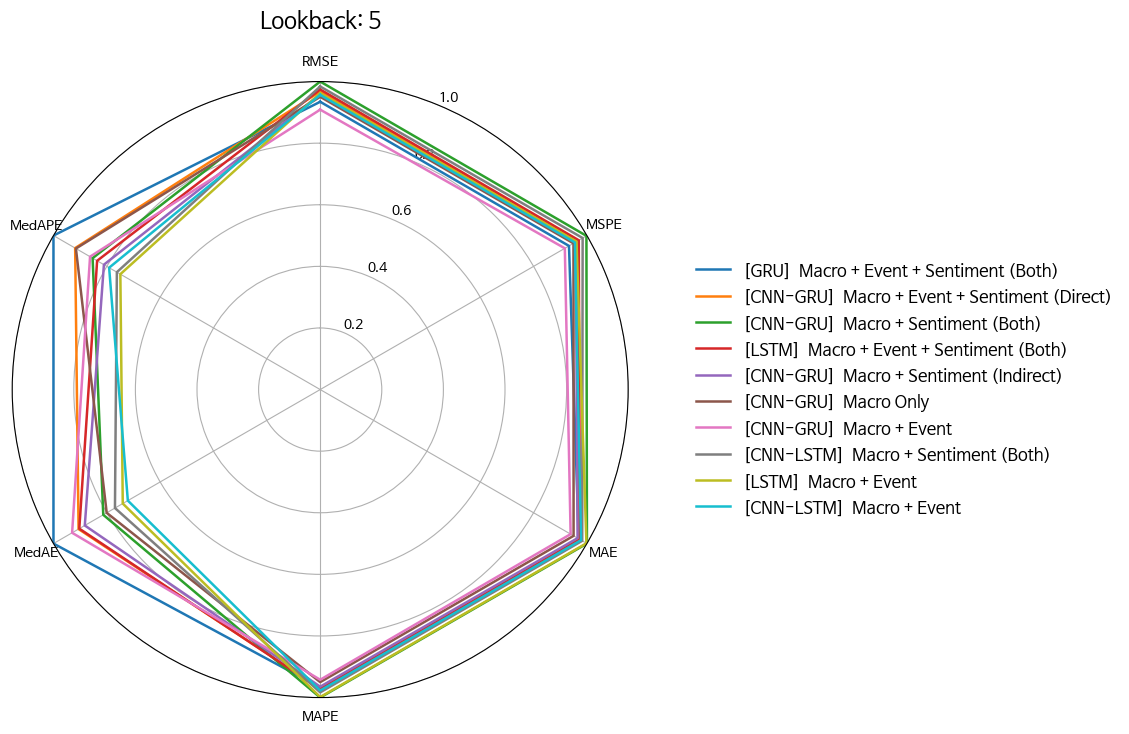


Top 10 by Radar Area:


Model & Feature Case   RMSE   MSPE    MAE  \
0          [LSTM]  Macro + Event + Sentiment (Both) 0.8885 0.8740 0.9390   
1   [CNN-GRU]  Macro + Event + Sentiment (Indirect) 0.9327 0.9266 0.9823   
2           [CNN-GRU]  Macro + Sentiment (Indirect) 0.8830 0.8800 0.8925   
3       [CNN-GRU]  Macro + Event + Sentiment (Both) 1.0000 1.0000 0.9750   
4      [CNN-LSTM]  Macro + Event + Sentiment (Both) 0.8753 0.8892 0.8391   
5          [CNN-LSTM]  Macro + Sentiment (Indirect) 0.9796 0.9785 1.0000   
6        [LSTM]  Macro + Event + Sentiment (Direct) 0.9743 0.9772 0.9765   
7              [LSTM]  Macro + Sentiment (Indirect) 0.9038 0.9006 0.9743   
8  [CNN-LSTM]  Macro + Event + Sentiment (Indirect) 0.9084 0.9171 0.9108   
9       [GRU]  Macro + Event + Sentiment (Indirect) 0.8079 0.8162 0.8636   

    MAPE  MedAE  MedAPE  Area of Radar  
0 0.9298 1.0000  1.0000         2.2901  
1 0.9783 0.7858  0.8623         2.1590  
2 0.8875 0.8356  0.9162         2.0225  
3 0.9729 0.7354  0.5906         2.0196  
4 0.8428 0.9458  0.8822         2.0071  
5 1.0000 0.6041  0.6718         1.9940  
6 0.9775 0.6449  0.6728         1.9835  
7 0.9723 0.7020  0.7568         1.9644  
8 0.9125 0.7596  0.7291         1.9090  
9 0.8631 0.8266  0.8706         1.8386

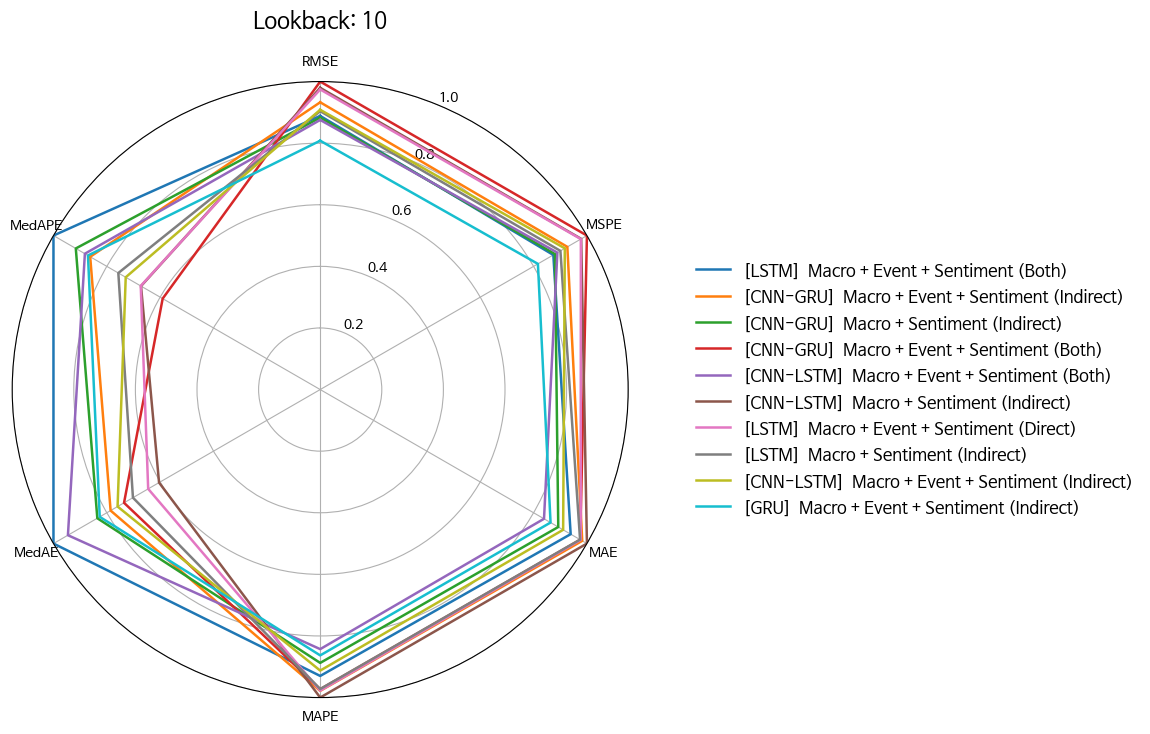


Top 10 by Radar Area:


Model & Feature Case   RMSE   MSPE    MAE   MAPE  \
0         [CNN-LSTM]  Macro + Sentiment (Both) 0.9686 0.9681 0.9907 0.9890   
1  [CNN-GRU]  Macro + Event + Sentiment (Both) 1.0000 1.0000 1.0000 1.0000   
2           [LSTM]  Macro + Sentiment (Direct) 0.9598 0.9589 0.9965 0.9938   
3                           [LSTM]  Macro Only 0.9688 0.9689 0.9814 0.9801   
4       [CNN-LSTM]  Macro + Sentiment (Direct) 0.9548 0.9556 0.9792 0.9778   
5   [LSTM]  Macro + Event + Sentiment (Direct) 0.9798 0.9858 0.9727 0.9749   
6      [CNN-GRU]  Macro + Sentiment (Indirect) 0.9467 0.9460 0.9858 0.9847   
7                    [CNN-LSTM]  Macro + Event 0.9333 0.9395 0.9298 0.9300   
8             [LSTM]  Macro + Sentiment (Both) 0.9416 0.9429 0.9558 0.9541   
9         [LSTM]  Macro + Sentiment (Indirect) 0.9616 0.9650 0.9700 0.9696   

   MedAE  MedAPE  Area of Radar  
0 1.0000  1.0000         2.5263  
1 0.9323  0.9405         2.4897  
2 0.9837  0.9588         2.4713  
3 0.9455  0.9609         2.4326  
4 0.9280  0.9067         2.3470  
5 0.9085  0.8671         2.3365  
6 0.9153  0.8646         2.2994  
7 0.9730  0.9363         2.2971  
8 0.9231  0.9204         2.2941  
9 0.8581  0.8467         2.2418

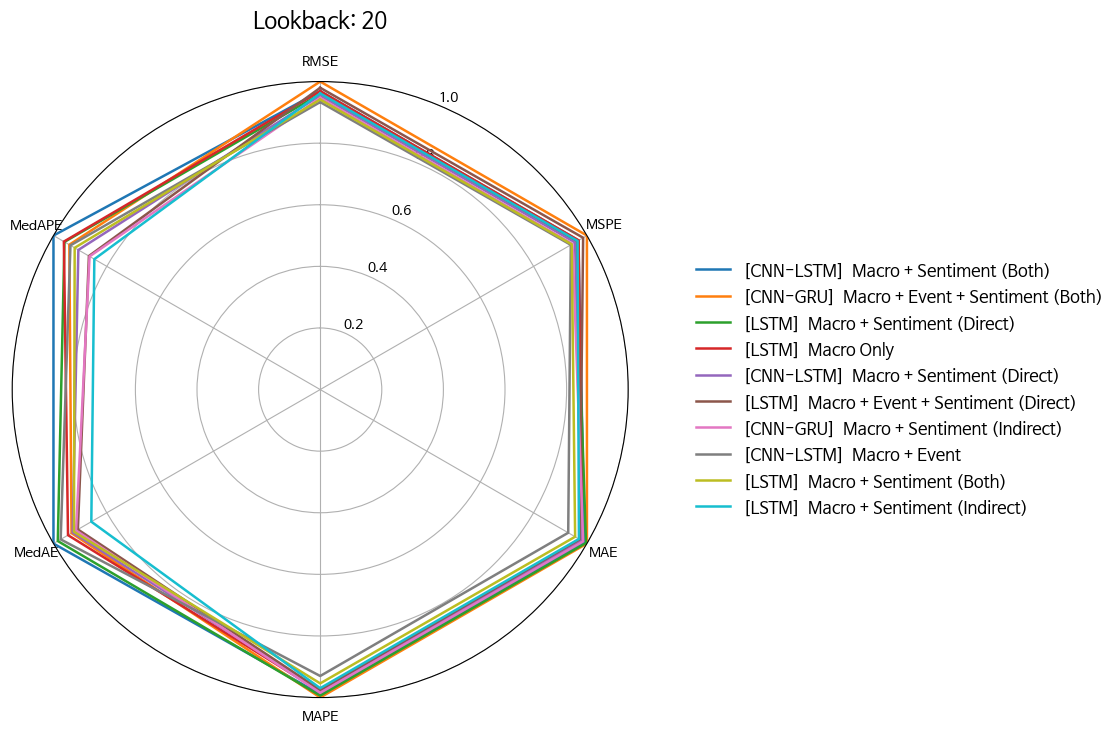


Top 10 by Radar Area:


Model & Feature Case   RMSE   MSPE    MAE  \
0    [CNN-GRU]  Macro + Event + Sentiment (Direct) 0.8584 0.8411 1.0000   
1     [LSTM]  Macro + Event + Sentiment (Indirect) 1.0000 1.0000 0.9773   
2                               [LSTM]  Macro Only 0.8183 0.8030 0.9851   
3  [CNN-GRU]  Macro + Event + Sentiment (Indirect) 0.8175 0.8079 0.9680   
4          [GRU]  Macro + Event + Sentiment (Both) 0.8121 0.7987 0.9848   
5      [CNN-GRU]  Macro + Event + Sentiment (Both) 0.8677 0.8595 0.9332   
6           [CNN-LSTM]  Macro + Sentiment (Direct) 0.8957 0.9030 0.9213   
7         [LSTM]  Macro + Event + Sentiment (Both) 0.9509 0.9495 0.9531   
8       [LSTM]  Macro + Event + Sentiment (Direct) 0.8005 0.7987 0.9216   
9               [LSTM]  Macro + Sentiment (Direct) 0.6956 0.6905 0.8829   

    MAPE  MedAE  MedAPE  Area of Radar  
0 1.0000 1.0000  1.0000         2.3476  
1 0.9839 0.5995  0.5768         1.9275  
2 0.9865 0.6217  0.7101         1.7562  
3 0.9713 0.6332  0.6214         1.6884  
4 0.9852 0.5750  0.5813         1.6360  
5 0.9370 0.5125  0.5496         1.5853  
6 0.9298 0.5315  0.4513         1.5744  
7 0.9584 0.3856  0.3446         1.5379  
8 0.9244 0.5009  0.4505         1.4188  
9 0.8862 0.6704  0.5889         1.4163

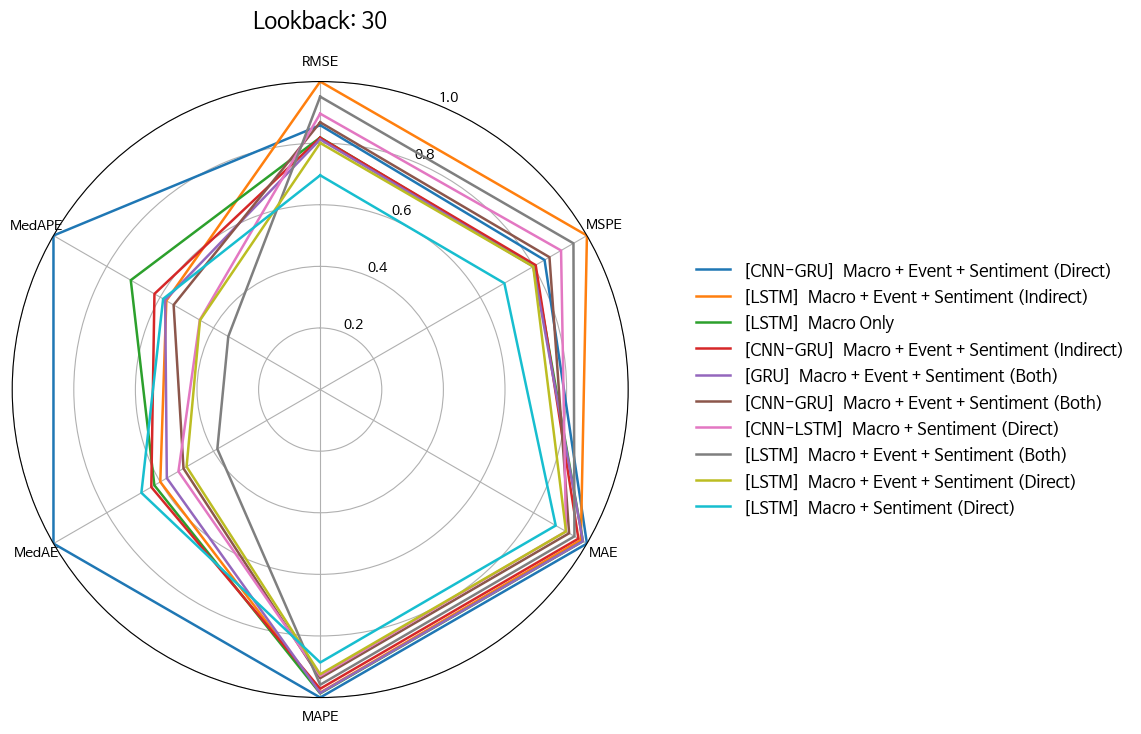


Top 10 by Radar Area:


Model & Feature Case   RMSE   MSPE    MAE   MAPE  \
0            [CNN-LSTM]  Macro + Sentiment (Both) 1.0000 1.0000 0.9722 0.9730   
1                [LSTM]  Macro + Sentiment (Both) 0.9967 0.9957 1.0000 1.0000   
2          [CNN-LSTM]  Macro + Sentiment (Direct) 0.9252 0.9228 0.9138 0.9123   
3                          [CNN-LSTM]  Macro Only 0.9212 0.9271 0.9164 0.9182   
4            [LSTM]  Macro + Sentiment (Indirect) 0.8876 0.8765 0.9458 0.9422   
5       [GRU]  Macro + Event + Sentiment (Direct) 0.6908 0.6659 0.8471 0.8381   
6                       [CNN-LSTM]  Macro + Event 0.8249 0.8076 0.8876 0.8798   
7        [LSTM]  Macro + Event + Sentiment (Both) 0.9421 0.9584 0.8438 0.8478   
8     [GRU]  Macro + Event + Sentiment (Indirect) 0.5799 0.5703 0.7342 0.7271   
9  [CNN-LSTM]  Macro + Event + Sentiment (Direct) 0.7228 0.7264 0.7553 0.7570   

   MedAE  MedAPE  Area of Radar  
0 0.7601  0.7814         2.1794  
1 0.7046  0.5456         2.0010  
2 0.7174  0.7089         1.8834  
3 0.8349  0.5812         1.8760  
4 0.7362  0.6682         1.8519  
5 0.9822  1.0000         1.8318  
6 0.8185  0.6528         1.7134  
7 0.5165  0.3795         1.4802  
8 1.0000  0.8671         1.4637  
9 0.8715  0.6527         1.4487

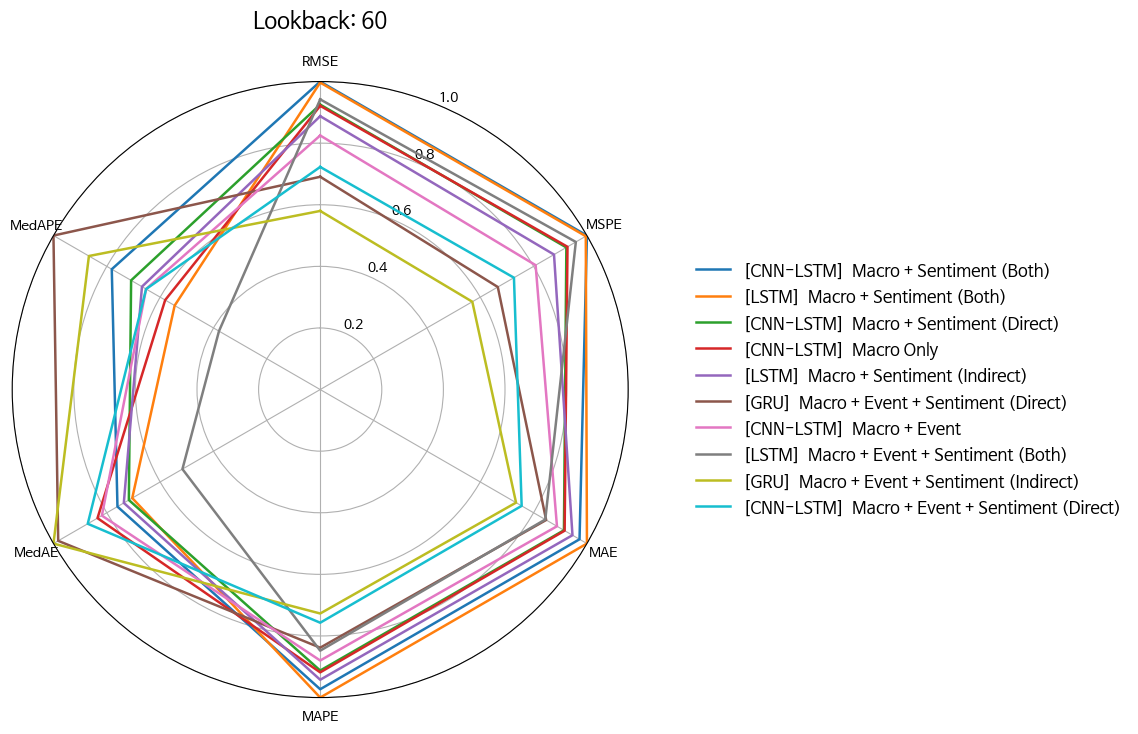


Top 10 by Radar Area:


Model & Feature Case   RMSE   MSPE    MAE   MAPE  \
0                       [CNN-LSTM]  Macro Only 1.0000 1.0000 1.0000 1.0000   
1                        [LSTM]  Macro + Event 0.8382 0.8603 0.8497 0.8552   
2           [LSTM]  Macro + Sentiment (Direct) 0.8403 0.8522 0.9860 0.9852   
3      [CNN-GRU]  Macro + Sentiment (Indirect) 0.8731 0.8871 0.8587 0.8632   
4                     [CNN-GRU]  Macro + Event 0.8841 0.8995 0.8380 0.8411   
5          [CNN-GRU]  Macro + Sentiment (Both) 0.8320 0.8628 0.8467 0.8560   
6  [CNN-GRU]  Macro + Event + Sentiment (Both) 0.8103 0.8251 0.9228 0.9230   
7                         [GRU]  Macro + Event 0.7329 0.7681 0.6860 0.6937   
8     [LSTM]  Macro + Event + Sentiment (Both) 0.6819 0.7165 0.6899 0.6927   
9     [CNN-LSTM]  Macro + Sentiment (Indirect) 0.9593 0.9743 0.9493 0.9582   

   MedAE  MedAPE  Area of Radar  
0 0.7373  0.7399         2.1749  
1 1.0000  1.0000         2.1098  
2 0.7684  0.8783         2.0342  
3 0.8253  0.9610         2.0014  
4 0.7420  0.8256         1.8275  
5 0.6976  0.6974         1.6614  
6 0.6171  0.6569         1.6407  
7 0.8827  0.9859         1.6329  
8 0.8962  0.8674         1.4941  
9 0.3554  0.2253         1.4747

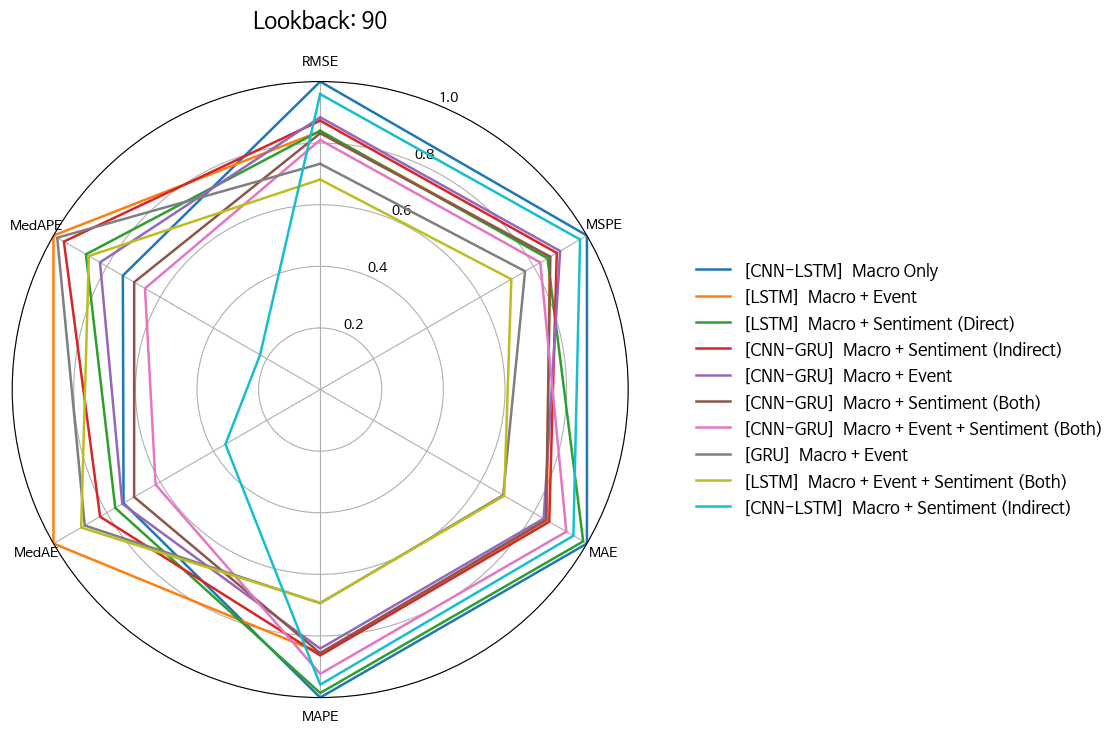

In [4]:
# Visualization
for lookback in sorted(df.Lookback.unique()):
    df_sub = df[df.Lookback == lookback]
    plot_radarchart(df_sub, metric_colnames=METRIC_COLNAMES,
                    label_colname=LABEL_COLNAME, 
                    scaling=SCALING, top_ranking=TOP_RANKING,
                    title='Lookback: '+str(np.unique(df_sub.Lookback)[0]))